In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir="Data"

In [3]:
img_height, img_width = 180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 720 files belonging to 6 classes.
Using 576 files for training.


2022-12-16 22:27:48.853683: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 720 files belonging to 6 classes.
Using 144 files for validation.


In [5]:
class_names = train_ds.class_names
class_names

['Cricket Field', 'Forest Land', 'Grass', 'Hard Sand', 'Road', 'Tiles']

In [6]:
mobilenet_model = Sequential()

pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(180,180,3),include_top=False,weights="imagenet",
                                                     pooling="avg",classes=6)
for layer in pretrained_model.layers:
    layer.trainable=False
    
mobilenet_model.add(pretrained_model)
mobilenet_model.add(Flatten())
mobilenet_model.add(Dense(512,activation="relu"))
mobilenet_model.add(Dense(6,activation="softmax"))                                         

9420800/9406464 [==============================] - 5s 1us/step


In [7]:
mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 module_wrapper (ModuleWrapp  (None, 1280)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              655872    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 6)                3078      
 pper)                                                           
                                                                 
Total params: 2,916,934
Trainable params: 658,950
Non-tr

In [8]:
mobilenet_model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.losses.BinaryCrossentropy(),
                     metrics=["accuracy"])

In [9]:
epochs=10
history = mobilenet_model.fit(train_ds,
                           validation_data = val_ds,
                           epochs=epochs)

Epoch 1/10
18/18 [==============================] - 40s 2s/step - loss: 0.2570 - accuracy: 0.7413 - val_loss: 0.1034 - val_accuracy: 0.9236
Epoch 2/10
18/18 [==============================] - 36s 2s/step - loss: 0.0779 - accuracy: 0.9531 - val_loss: 0.0615 - val_accuracy: 0.9583
Epoch 3/10
18/18 [==============================] - 36s 2s/step - loss: 0.0481 - accuracy: 0.9705 - val_loss: 0.0503 - val_accuracy: 0.9653
Epoch 4/10
18/18 [==============================] - 35s 2s/step - loss: 0.0357 - accuracy: 0.9757 - val_loss: 0.0327 - val_accuracy: 0.9931
Epoch 5/10
18/18 [==============================] - 34s 2s/step - loss: 0.0278 - accuracy: 0.9896 - val_loss: 0.0353 - val_accuracy: 0.9861
Epoch 6/10
18/18 [==============================] - 35s 2s/step - loss: 0.0198 - accuracy: 0.9913 - val_loss: 0.0504 - val_accuracy: 0.9514
Epoch 7/10
18/18 [==============================] - 35s 2s/step - loss: 0.0180 - accuracy: 0.9913 - val_loss: 0.0432 - val_accuracy: 0.9444
Epoch 8/10
18/18 [==

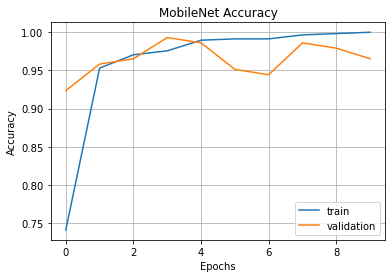

In [10]:
fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
#plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title("MobileNet Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","validation"])
plt.savefig("mobilenet-accuracy.png")
plt.show()


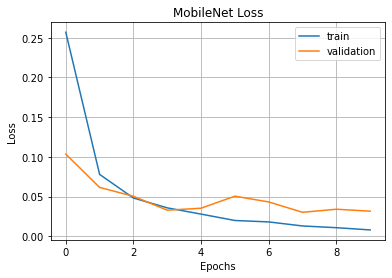

In [11]:
fig1 = plt.gcf()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
#plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title("MobileNet Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train","validation"])
plt.savefig("mobilenet-loss.png")
plt.show()


In [12]:
np.mean(history.history["accuracy"])

0.9607638776302337